<a href="https://colab.research.google.com/github/rtajeong/M4_2025/blob/main/lab_59_mnist_keras_rev4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras with MNIST dataset

In [11]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Data load

In [12]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [13]:
train_images[0].max()   # 8-bit

np.uint8(255)

In [14]:
type(train_images), type(train_images[0]), train_images[0].shape

(numpy.ndarray, numpy.ndarray, (28, 28))

In [15]:
type(train_labels), type(train_labels[0]), train_labels[0]

(numpy.ndarray, numpy.uint8, np.uint8(5))

In [16]:
train_images.shape, train_labels.dtype

((60000, 28, 28), dtype('uint8'))

## MNIST image and Preprocessing

<function matplotlib.pyplot.show(close=None, block=None)>

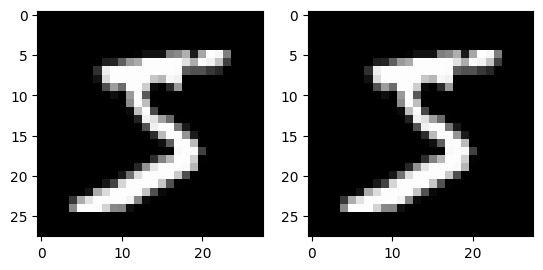

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap='gray')  # 0=검정, 255=흰색
plt.subplot(1,2,2)
plt.imshow(train_images[0]/255, cmap='gray')
plt.show

In [37]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
# just for checking
print(type(train_labels), train_labels[:10])
train_images.shape, train_labels.shape

<class 'numpy.ndarray'> [5 0 4 1 9 2 1 3 1 4]


((60000, 28, 28), (60000,))

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [ ]:
print(train_labels[:10], type(train_labels), )

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] <class 'numpy.ndarray'>


## MLP

### Single flattened layer

In [68]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28*1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28*28*1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [69]:
train_images.shape, train_labels.shape

((60000, 784), (60000, 10))

In [7]:
# a single MLP layer

model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape = (28*28*1, )))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer= opt,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, batch_size=128, verbose=2)

test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

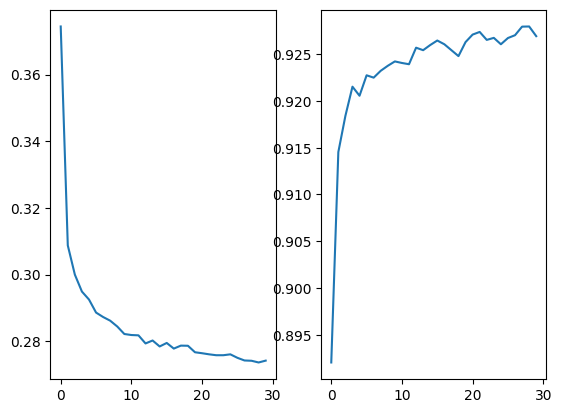

In [18]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[1.8027333e-07, 3.6915811e-30, 3.9390888e-02, 9.6060699e-01,
        1.4898811e-27, 1.9512368e-06, 2.5229158e-18, 3.1045592e-22,
        2.7877524e-08, 7.0979538e-22]], dtype=float32)

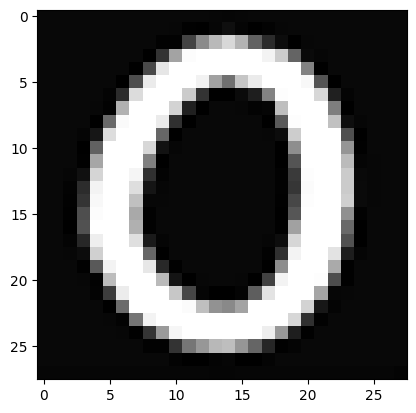

In [42]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

image = Image.open('digit_0.png' )
image = ImageOps.grayscale(image)
image = np.asarray(image.resize((28,28)))
image = 255. - image
plt.imshow(image, cmap='gray')
print(np.asarray(image).shape)
# model.predict(image.reshape(1, 28,28,1).astype('float64') / 255)
model.predict(image.reshape(1, 28*28)/255.)

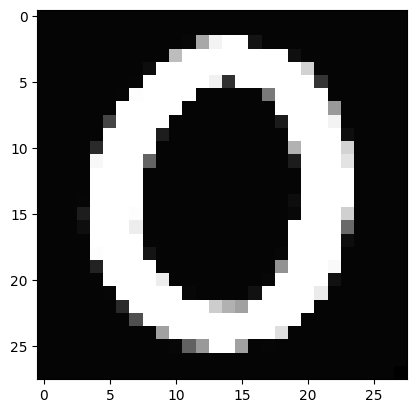

(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[2.2377521e-05, 1.2153495e-29, 7.9906635e-02, 9.2006761e-01,
        5.4075486e-28, 3.4062455e-06, 1.0097981e-17, 5.8315122e-22,
        1.8700728e-08, 7.6843509e-22]], dtype=float32)

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('digit_0.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
image = 255 - image

plt.imshow(image, cmap='gray')
plt.show()

print(image.shape)

# Dense 입력 (batch, features)
model.predict(image.reshape(1, 28*28)/255.)


### MLP with hidden layers

In [61]:
model = models.Sequential()
model.add(layers.Input(shape=(28*28*1, )))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
print(model.layers[0].input)
print(model.layers[-1].output)

<KerasTensor shape=(None, 784), dtype=float32, sparse=False, ragged=False, name=keras_tensor_35>
<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_41>


In [64]:
print(model.input_shape)   # 모델 전체에 대한 input_shape, output_shape
print(model.output_shape)

(None, 784)
(None, 10)


In [65]:
model.layers[0].input, model.layers[0].output, model.layers[0].trainable

(<KerasTensor shape=(None, 784), dtype=float32, sparse=False, ragged=False, name=keras_tensor_35>,
 <KerasTensor shape=(None, 100), dtype=float32, sparse=False, ragged=False, name=keras_tensor_36>,
 True)

In [73]:
model.compile(optimizer= keras.optimizers.RMSprop(),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [72]:
model.fit(train_images, train_labels, epochs=30, batch_size=200)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8265 - loss: 0.6331
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9464 - loss: 0.1824
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9642 - loss: 0.1189
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0910
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9783 - loss: 0.0706
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9822 - loss: 0.0590
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9853 - loss: 0.0497
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9870 - loss: 0.0407
Epoch 9/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9899 - loss: 0.0346
Epoch 10/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0293
Epoch 11/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9927 - loss: 0.0240
Epoch 12/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [74]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9748 - loss: 0.1631
test_acc =  0.9793999791145325


In [76]:
image = cv2.imread('digit_0.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
image = 255 - image

model.predict(image.reshape(1, 28*28))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## CNN

In [ ]:
# keras.layers.Conv2D(filters, kernel_size,...)
# - filters: the dimensionality of the output space (the number of output filters).
# - parameter 수: 입력채널수 X 필터폭 X 필터높이 X 출력채널수
# - bias 도 고려

In [77]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [78]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# print(model.output_shape)

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
print(model.output_shape)

model.summary()

(None, 10)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,514 (240.29 KB)

 Trainable params: 61,514 (240.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# number of parameters
# conv2d_1 : 3*3*1*32 + 32 = 320
# conv2d_2 : 3*3*32*64 + 64 = 18496
# conv2d_3 : 3*3*64*64 + 64 = 36928
# dense_6 : 3*3*64*10 + 10 = 5770

In [79]:
model.compile(optimizer= 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [80]:
model.fit(train_images, train_labels, epochs=30, batch_size=200)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7973 - loss: 0.7255
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9751 - loss: 0.0816
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9821 - loss: 0.0577
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9863 - loss: 0.0445
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0365
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9909 - loss: 0.0282
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9922 - loss: 0.0254
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9934 - loss: 0.0208
Epoch 9/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9946 - loss: 0.0162
Epoch 10/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9955 - loss: 0.0140
Epoch 11/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9951 - loss: 0.0140
Epoch 12/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [83]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9901 - loss: 0.0472
test_acc =  0.9926000237464905


(28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

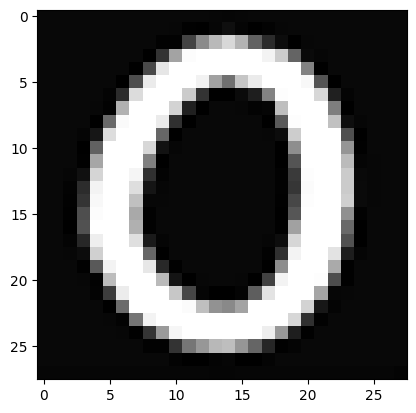

In [84]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
image = Image.open('digit_0.png' ).convert('LA')  # to gray
image = ImageOps.grayscale(image)
image = np.asarray(image.resize((28,28)))
image = 255. - image
plt.imshow(image, cmap='gray')
print(np.asarray(image).shape)
# model.predict(image.reshape(1, 28,28,1).astype('float64') / 255)
model.predict(image.reshape(1, 28,28,1))

## Without Deep Learning

In [ ]:
# just for reference
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28*1))
test_images = test_images.reshape((10000, 28*28*1))

X_train = train_images.astype('float32')/255.         # scaling
X_test  = test_images.astype('float32')/255.
y_train, y_test = train_labels, test_labels


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [ ]:
clf = SGDClassifier(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9149


-------------- end ---------------------